#       PREDICTION OF AUSTISM USING MACHINE LEARNING MODELS

Autism is a neurodevelopmental disorder characterized by difficulties with social interaction and communication, and
by restricted and repetitive behavior.Parents often notice signs during the first three years of their child's life.With the advancement of machine learning and its algorithms, autism can be predicted at an early stage.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importing the dataset

In [2]:
df = pd.read_csv("Toddler Autism dataset July 2018.csv")

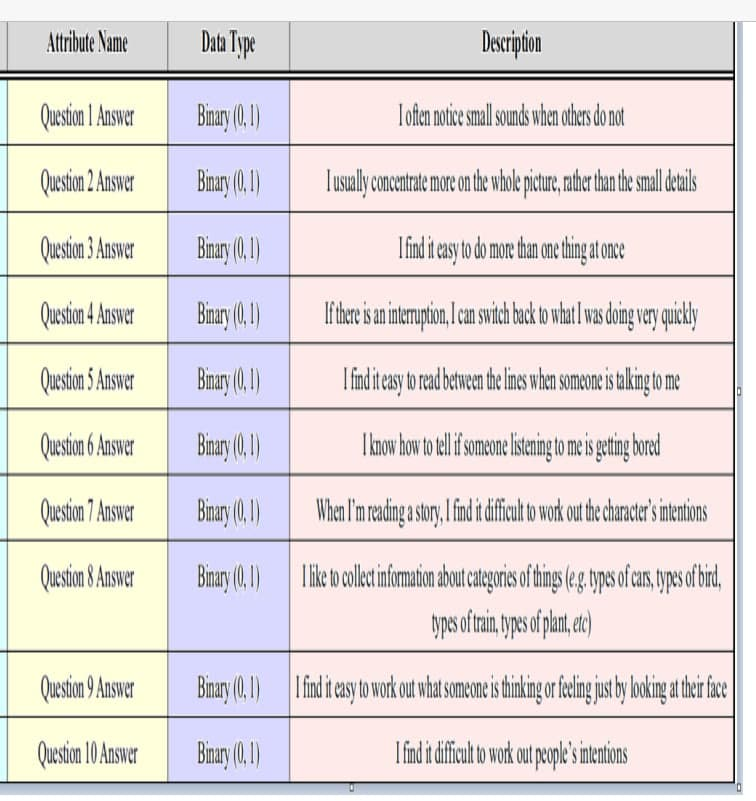

The dataset used here is based on the Quantitative Checklist for Autism in Toddlers (Q-CHAT) screening method. Q-CHAT-10, containing a set of 10 questions has been used. The answers to these questions are mapped to binary values as class type. 
The class value “Yes” is assigned if the Q-CHAT-10 score happens to be greater than 3, that is, there are potential ASD traits. Otherwise, class value “No” is assigned, implying no ASD traits.

In [3]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [4]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'ASD'],
      dtype='object')

In [5]:
df.drop(['Case_No','Who completed the test'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Ethnicity            1054 non-null   object
 14  Jaundice             1054 non-null   object
 15  Family_mem_with_ASD  1054 non-null   object
 16  ASD   

In [7]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


# Data Visualization

C:\Users\Subash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ASD', ylabel='count'>

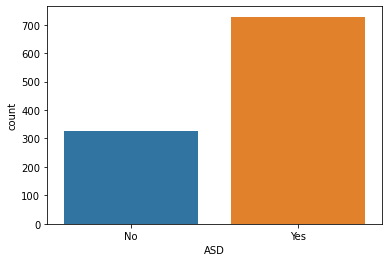

In [8]:
sns.countplot(df['ASD'])

C:\Users\Subash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

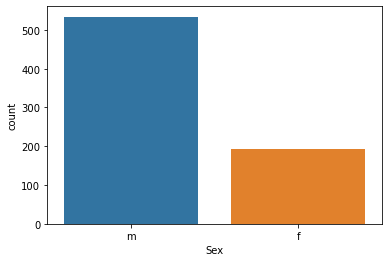

In [9]:
df = df[df['ASD']=='Yes']
sns.countplot(df['Sex'])

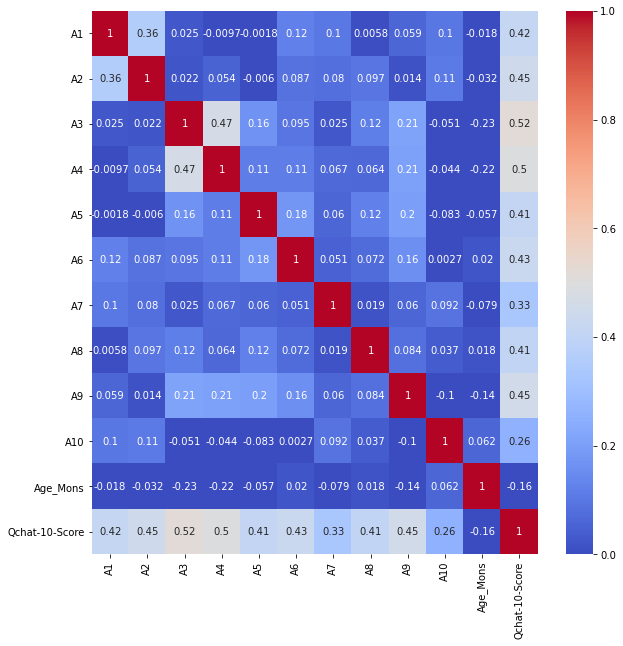

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1)

In [11]:

sns.countplot(x='Jaundice',data=df1,hue='Sex')
ax[0].set_title('ASD positive Adults born with jaundice based on gender')
ax[0].set_xlabel('Jaundice while birth')


NameError: name 'df1' is not defined

In [ ]:
sns.distplot(df1['Age_Mons'],kde=False,bins=30,color='blue')
ax[1].set_xlabel('Toddlers age in months')
ax[1].set_title('Age distribution of ASD positive')

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='ASD',data=df,hue='Ethnicity',palette='rainbow',ax=ax[0])
ax[0].set_title('Positive ASD Children in different ethnicities')
ax[0].set_xlabel('Children with ASD')
sns.countplot(x='Family_mem_with_ASD',data=df,hue='Ethnicity',palette='rainbow',ax=ax[1])
ax[1].set_title('Positive ASD relatives with Autism distribution for different ethnicities')
ax[1].set_xlabel('Relatives with ASD')
plt.tight_layout()

In [ ]:
df1=df[df["ASD"]=="Yes"]
df1

In [ ]:
sns.countplot(df1['Ethnicity'])
plt.xticks(rotation=90)

In [ ]:
sns.countplot(x='Ethnicity',hue='Sex',data=df1)
plt.xticks(rotation=90)

# Preprocessing


In [12]:
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
ASD                    0
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder
cat_features = df.select_dtypes(include='object')
num_features = df.select_dtypes(exclude='object')
df = pd.get_dummies(df, drop_first=True)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
1,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
5,1,1,0,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,0,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1047,1,1,0,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1050,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1051,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,1,0


# TRAIN TEST SPLIT

In [14]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [16]:
X_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes
902,1,1,1,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
790,1,0,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
217,1,1,1,1,1,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
421,0,0,0,1,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
128,0,0,1,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,0,1,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
732,1,1,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
777,1,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
318,1,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [17]:
X_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes
1016,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
773,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
944,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
465,0,0,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
503,1,1,0,1,1,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0,0,0,0,1,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
893,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
676,1,1,0,1,0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [18]:
y_train

902    0
790    1
217    1
421    0
128    0
      ..
839    0
732    0
777    0
318    0
293    0
Name: Family_mem_with_ASD_yes, Length: 582, dtype: uint8

In [19]:
y_test

1016    0
773     0
944     0
465     1
503     0
       ..
798     0
3       0
893     1
676     0
914     0
Name: Family_mem_with_ASD_yes, Length: 146, dtype: uint8

In [20]:
X_train.shape, X_test.shape

((582, 24), (146, 24))

In [21]:
y_train.shape, y_test.shape

((582,), (146,))

# 1.LOGISTIC REGRESSION

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [26]:
#Train the model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_test)

C:\Users\Subash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report(y_test, y_train_pred)

C:\Users\Subash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.82      1.00      0.90       120\n           1       0.00      0.00      0.00        26\n\n    accuracy                           0.82       146\n   macro avg       0.41      0.50      0.45       146\nweighted avg       0.68      0.82      0.74       146\n'

In [32]:
confusion_matrix(y_test,y_train_pred)

array([[120,   0],
       [ 26,   0]], dtype=int64)

# 2.KNN

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems.K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [36]:
pred = knn.predict(X_test)

In [37]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       120\n           1       0.96      1.00      0.98        26\n\n    accuracy                           0.99       146\n   macro avg       0.98      1.00      0.99       146\nweighted avg       0.99      0.99      0.99       146\n'

In [186]:
confusion_matrix(y_test, pred)

array([[119,   1],
       [  0,  26]], dtype=int64)

# 3.Decision Tree

Decision tree algorithm falls under the category of supervised learning.Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
pred = dtree.predict(X_test)

In [60]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.88       120\n           1       0.46      0.42      0.44        26\n\n    accuracy                           0.81       146\n   macro avg       0.67      0.66      0.66       146\nweighted avg       0.80      0.81      0.81       146\n'

In [61]:
confusion_matrix(y_test,pred)

array([[107,  13],
       [ 15,  11]], dtype=int64)

# 4.Random Forest

Random Forest is a supervised machine learning algorithm made up of decision trees,used to create an uncorrelated forest of decision trees.

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
pred = rf.predict(X_test)

In [65]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.97      0.90       120\n           1       0.40      0.08      0.13        26\n\n    accuracy                           0.82       146\n   macro avg       0.61      0.53      0.51       146\nweighted avg       0.75      0.82      0.76       146\n'

In [66]:
confusion_matrix(y_test,pred)

array([[117,   3],
       [ 24,   2]], dtype=int64)

# 5.SVC-Support Vector Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms.The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [67]:
from sklearn.svm import SVC

In [68]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [69]:
pred = model.predict(X_test)

In [70]:
classification_report(y_test,pred)

C:\Users\Subash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.82      1.00      0.90       120\n           1       0.00      0.00      0.00        26\n\n    accuracy                           0.82       146\n   macro avg       0.41      0.50      0.45       146\nweighted avg       0.68      0.82      0.74       146\n'

In [71]:
confusion_matrix(y_test,pred)

array([[120,   0],
       [ 26,   0]], dtype=int64)

We can Conclude that,Based on the observation K Nearest Neighbour is the best model for the prediction of austism in Children.It has an accuracy of 99%.While decision tree is not sutitable for this prediction as it has the least accuracy rate.